In [27]:
import pandas
%matplotlib inline

In [28]:
df = pandas.read_excel('s3://isat252-liu/house_price.xls')
df[:10]

,price,bathroom,house_type,lot_size,built_in,area
0,159900,1,single-family home,5662,1924,1584
1,1100000,1,single-family home,4138200,1932,900
2,182000,2,condo,7405,1945,1622
3,169900,1,single-family home,36155,1950,1556
4,148500,1,single-family home,9147,1959,1000
5,444900,6,single-family home,28314,1961,5201
6,178000,2,single-family home,11326,1964,1188
7,209000,2,single-family home,9147,1966,1918
8,349900,2,single-family home,204732,1967,3850
9,1100000,2,single-family home,4356000,1970,2541


# 3.

In [29]:
df['unit_price'] = df['price']/df['area']
df[:5]

,price,bathroom,house_type,lot_size,built_in,area,unit_price
0,159900,1,single-family home,5662,1924,1584,100.946970
1,1100000,1,single-family home,4138200,1932,900,1222.222222
2,182000,2,condo,7405,1945,1622,112.207152
3,169900,1,single-family home,36155,1950,1556,109.190231
4,148500,1,single-family home,9147,1959,1000,148.500000


## 4.1

In [37]:
avg_price_per_year = df.groupby('built_in').mean()['unit_price']
avg_price_per_year[:]

built_in
1924     100.946970
1932    1222.222222
1945     112.207152
1950     109.190231
1959     148.500000
1961      85.541242
1964     149.831650
1966     108.967675
1967      90.883117
1970     432.900433
1972     108.144796
1975      82.817680
1978      93.619048
1985     117.946782
1986     145.084270
1988     145.432498
1993     169.695457
1994     146.630435
1997     123.665174
1998     101.864667
1999     104.097222
2001     150.611621
2002     149.188838
2005     114.951558
2006     115.125392
2007     130.133929
2010     126.997717
2014     127.812258
2017     153.269025
2018     136.406995
Name: unit_price, dtype: float64

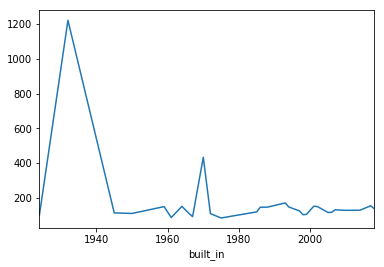

In [38]:
avg_price_per_year.plot()

The unit prices rose and fell steeply for a number of years (looking to be aroud the time of the Great Depression) but remanined fairly stable since the 19040s except for a bried period in the '70s.

## 4.2

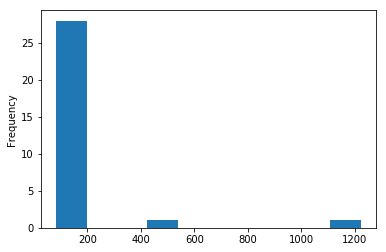

In [39]:
avg_price_per_year.plot.hist()

Most unit prices are below $200/sqft

## 4.3

In [33]:
avg_price_per_type = df.groupby('house_type').mean()['unit_price']
avg_price_per_type[:]

house_type
 condo                 113.666272
 single-family home    177.947148
 townhouse             125.363829
Name: unit_price, dtype: float64

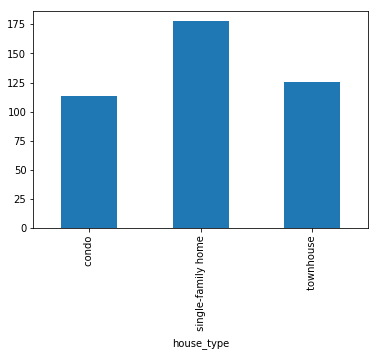

In [34]:
avg_price_per_type.plot.bar()

The most expensive average unit price is the single family homes.

## 4.4

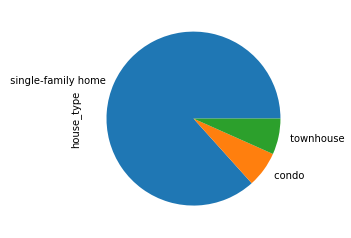

In [35]:
count_per_house_type = df['house_type'].value_counts()
count_per_house_type[:]
count_per_house_type.plot.pie() 

Single family homes make up the majority of the different types in the data.

## 4.5

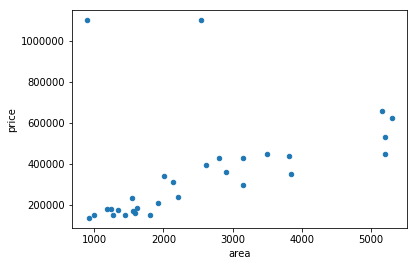

In [36]:
df.plot.scatter(x = 'area', y = 'price')

The is a fairly strong correlation between area and price, with two potential outliers. (Their price exceeds the normal expectations for the homes of the area, which could be due to having much more land or being an old house in an 